# Final Project: Apple Quality 
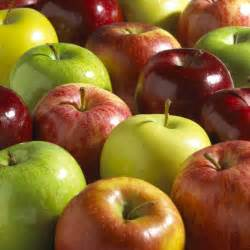
***
## Project Topic
This project uses a datatset that contains various characteristics of apples and their quality rating. Under supervised learning, binary classification will be used to classify what attributes make an apple good or bad. Considered models include logistic regression, random forest classifier, decision tree, gaussian naive bayes, and K-nearest neighbors. 
### Goals 
One goal of the project is to gain understanding on how apple characteristics affect a good or bad rating. Another goal to test models and determine which one best classifies apple quality. 
***
## Data 
***
The dataset contains apple quality data from an agricultural company. The data is tabular with 7 features and 1 target(Quality). Below is a brief description of the columns: 
- A_id: apple identifier 
- Size: apple size
- Weight: apple weight
- Sweetness: apple sweetness
- Crunchiness: apple crunchiness
- Juiciness: apple juciness
- Ripeness: apple ripeness
- Acidity: apple acidity
- Quailty: overall apple quality (target)
 

***
###### Source 

Elgiriyewithana , N. (2024, January 11). Apple Quality. Kaggle. https://www.kaggle.com/datasets/nelgiriyewithana/apple-quality/data 

###### GitHub Repository Link
https://github.com/mcdatbuff/Supervised-Final-Project

#### Data Preview and Types
* Below is a preview of the first 5 rows of data, along with a list of variable types and dimensions. The table has 9 columns and 4001 rows. There is also a table of descriptive statistics. 

In [718]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import r2_score, accuracy_score, classification_report, precision_score, confusion_matrix, roc_curve, auc, mean_squared_error, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.naive_bayes import GaussianNB
from sklearn.inspection import permutation_importance
from sklearn.tree import DecisionTreeClassifier

In [692]:
# Import data and display first 5 rows
df = pd.read_csv('apple_quality.csv')
df.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [693]:
# Display variable types and dataframe dimensions
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [694]:
# Display descriptive statistics
df.describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837


***
## Data Cleaning
***
__Overview__

For data cleaning, I checked for nulls and duplicate rows- there was one row of nulls (row 4000) that got removed and no duplicates. Because the Acidity values appear to be continous, I changed the data type from object to float. I then removed the A_id column as it was unnecessary for the analysis.

__1. Check for nulls__

In [695]:
df[df.isna().any(axis=1)]

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
4000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Created_by_Nidula_Elgiriyewithana,NaN


In [696]:
# Display sum of nulls and remove
print("Nulls before:", df.isnull().sum())
df = df.dropna(how='any')
print("Nulls after:", df.isnull().sum())

Nulls before: A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64
Nulls after: A_id           0
Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64


__2. Check for duplicates__

In [697]:
dup_rows = df[df.duplicated()]
dup_rows

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality


__3. Change Acidity data type from object to float__

In [698]:
# Convert Acididty into a float
df['Acidity'] = pd.to_numeric(df['Acidity'])

__4. Remove unnecessary A_id column__

In [699]:
# Remove A_id column 
df = df.drop("A_id", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4000 non-null   float64
 7   Quality      4000 non-null   object 
dtypes: float64(7), object(1)
memory usage: 281.2+ KB


__Data Cleaning Discussion__

As part of a preliminary cleaning, I also looked at the descriptive statistics for a quick check on obvious outliers, but the range of each data variable seemed reasonable. It seems that the data has already been normalized and have comparable ranges. I anticipate having to convert the Quality column from 'good/bad' to an integer value for further analysis after EDA.

***
## Exploratory Data Analysis (EDA)
***

__Categorical Value (Quality)__

A description of Quality was displayed to verify that there were only 2 unique values('good/bad'). The barplot is helpful to determine that the dataset is balanced. 

In [700]:
df.describe(include='object')

,Quality
count,4000
unique,2
top,good
freq,2004


Text(0, 0.5, 'Count')

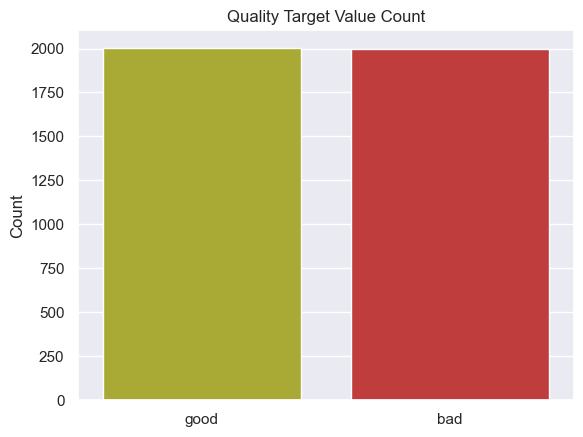

In [701]:
palette = ['tab:olive','tab:red']
sns.countplot(data=df, x='Quality', palette=palette)
plt.title('Quality Target Value Count')
plt.xlabel('')
plt.ylabel('Count')

__Pairplot__ 

The pairplot is a useful tool to get a quick overview of the pairwise relationships between the features. There doesn't appear to be any strong correlations, but the histograms indicate some distribution variability between Quality ratings. 

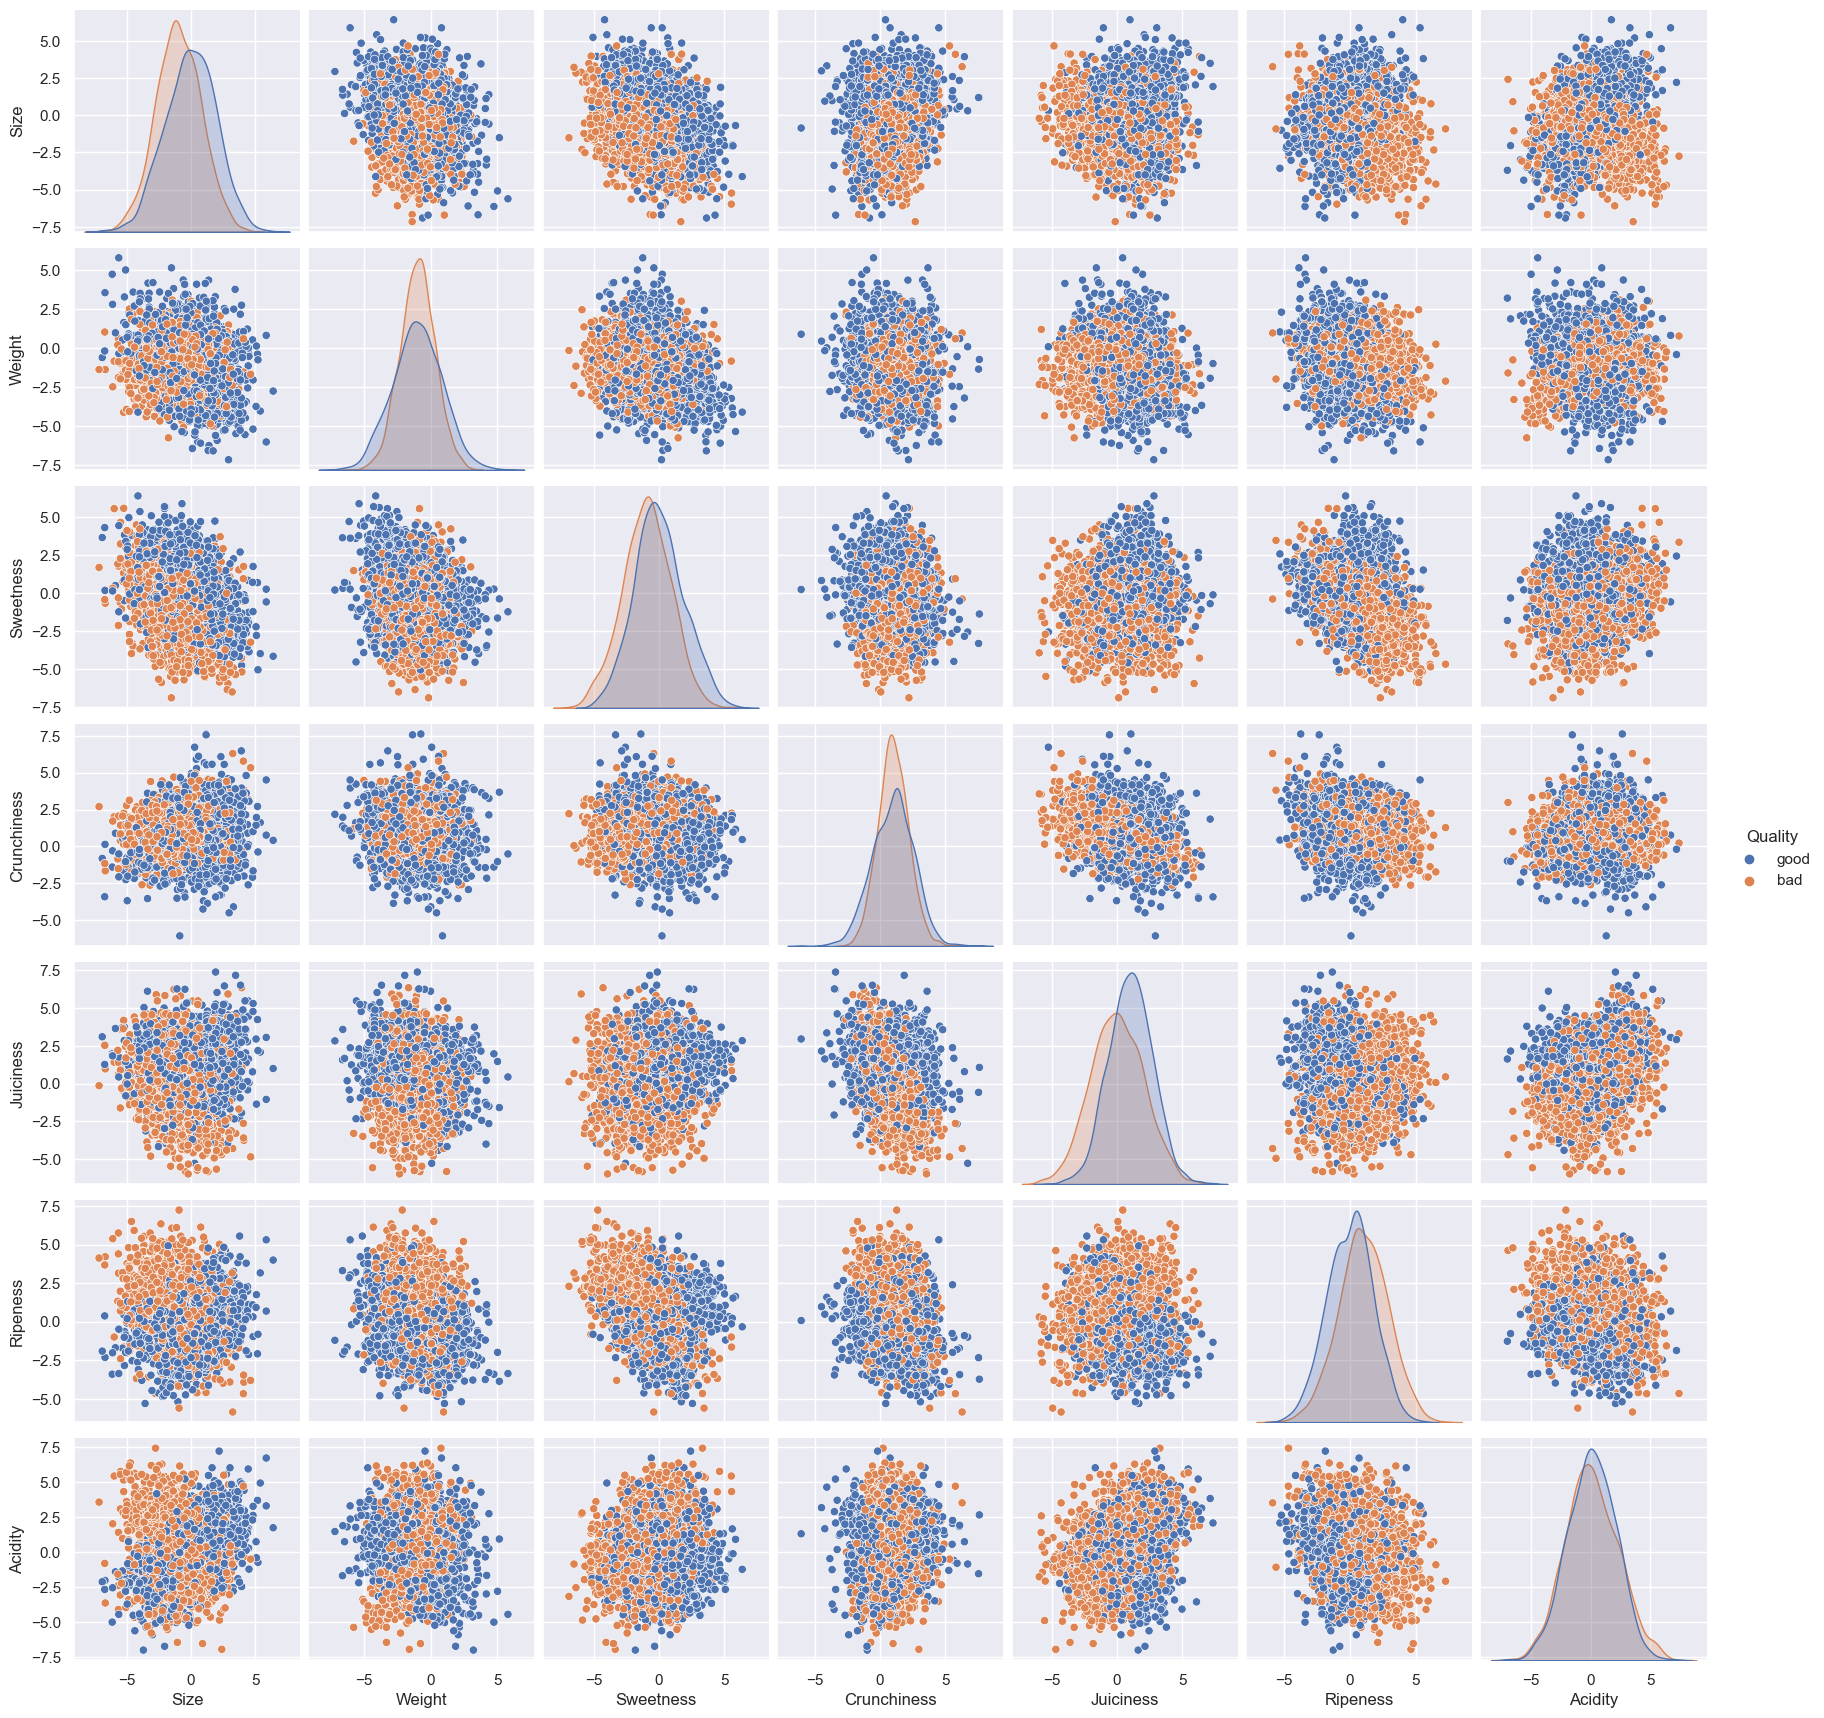

In [702]:
labels = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']
sns.pairplot(df, hue = 'Quality', vars=labels, diag_kind = 'kde')

__Histograms__

Histograms of each continuous feature was created to compare distributions betwen good and bad quality ratings. They are each normally distributed with similar ranges, which is attributed to the scaling of each variable in the dataset. When comparing the peaks between good and bad ratings, Juiciness and Ripeness show that they may be strong predictors for Quality ratings. For Juciness, the 'bad' peak is shifted left and 'good' is towards the right, indicating that a less juicy apple is more likely to be ranked bad. The opposite applies to Ripeness, as a higher Ripeness is classified as 'bad' more often. 

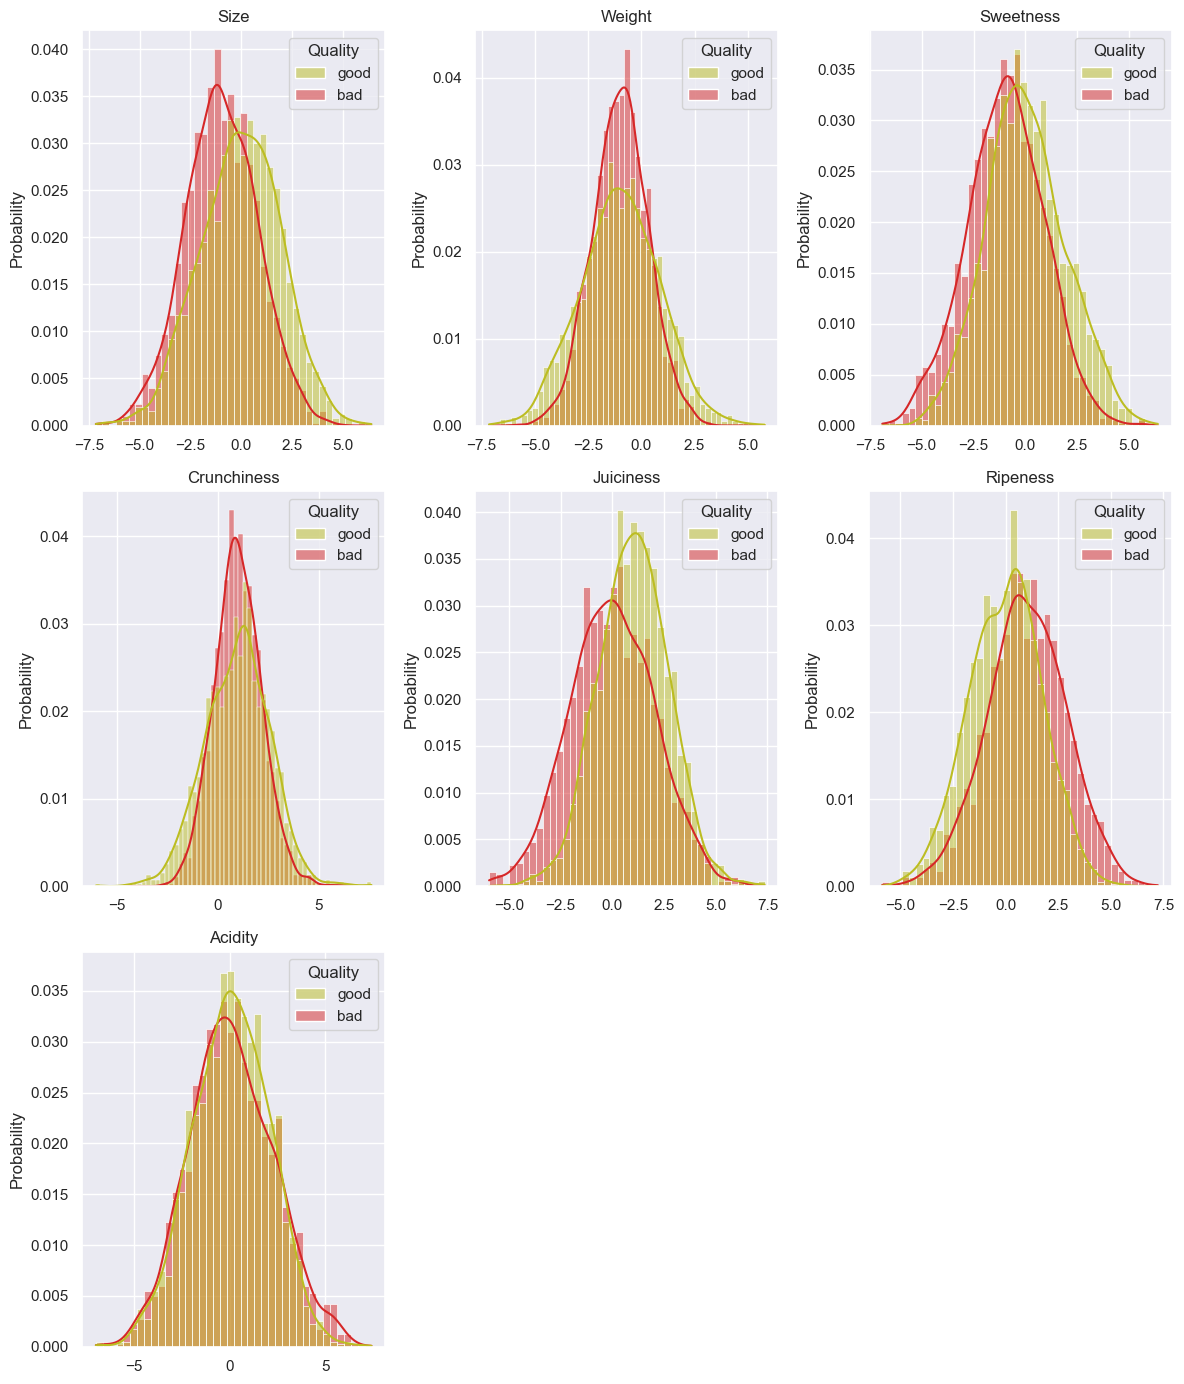

In [703]:
sns.set() 
plt.figure(figsize=(12,14))
for f, feature in enumerate(labels,1):
    plt.subplot(3, 3, f)
    ax = sns.histplot(data=df, x=feature, hue='Quality', stat='probability', kde=True, palette=palette).set(xlabel='')
    plt.tight_layout()
    plt.title(feature)

__Correlation Matrix__

A correlation heatmap was created to analyze the correlations between the multiple features. There doesn't appear to be any strong correlations- the highest value being 0.25 between Juciness and Acidity. This indicates that there are probably not any redundant features when considering binary classification of apple quality, and all features will be used. 

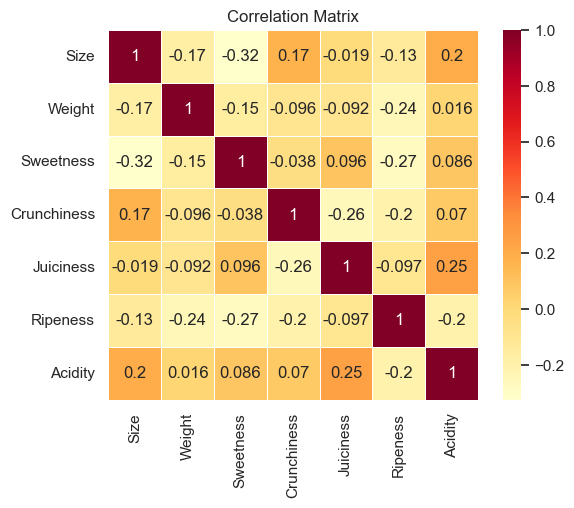

In [704]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap = "YlOrRd", square=True, linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

__EDA Discussion__

The exploratory data analysis provided valuable insight regarding both the categorical and continuous variables. It was determined that the data is balanced by Quality ratings, with an equal number of good and bad ratings. There was little correlation between features, proving them all useful for classification models. 

***
## Models 
***

###### Feature Engineering

Before making the models, I created a new column ('Rating') with integer values of 0 and 1 for good and bad quality rating. The conversion to a 0/1 is essential for the classification models.  

In [705]:
df['Rating'] = np.nan
df['Rating'] = df['Quality'].mask(df.Quality == 'bad', 0).mask(df.Quality == 'good', 1)
df['Rating'] = pd.to_numeric(df['Rating'])
df.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality,Rating
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good,1
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good,1
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad,0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good,1
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good,1


##### Split into train and test sets

I created X (features) and y (target) subsets of data, then split them into train and test sets with a 20/80 split. 

In [706]:
X = df[df.columns.drop(['Quality', 'Rating'])]
y = df['Rating']
X_train , X_test , y_train , y_test = train_test_split(X, y, random_state=42,  test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3200, 7)
(800, 7)
(3200,)
(800,)


### 1. Logistic Regression

The first model is a logistic regression model and resulting confusion matrix/classification report. It had decent precision, recall, and f1 scores, with 98 and 99 true positive/negatives. 

In [716]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
logacc = accuracy_score(y_test, y_pred)
logconf = confusion_matrix(y_test, y_pred)
logreport = classification_report(y_test, y_pred)
log_auc = auc(fpr, tpr)
y_prob = lr.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
print("Confusion Matrix:")
print(logconf)
print("  ")
print("Classification Report:")
print(logreport)

Confusion Matrix:
[[303  98]
 [ 99 300]]
  
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.76      0.75       401
           1       0.75      0.75      0.75       399

    accuracy                           0.75       800
   macro avg       0.75      0.75      0.75       800
weighted avg       0.75      0.75      0.75       800



### 2. Random Forest Classifier

The random forest classifier was implemented, yielding much higher accuracy results. 

In [733]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
rf_pred = clf.predict(X_test)
rfacc = accuracy_score(y_test, rf_pred)
rfconf = confusion_matrix(y_test, rf_pred)
rf_prob = clf.predict_proba(X_test)[:, 1]
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_prob)
rfreport = classification_report(y_test, rf_pred)
rf_auc = auc(rf_fpr, rf_tpr)

print("Confusion Matrix:")
print(rfconf)
print("  ")
print("Classification Report:")
print(rfreport)

Confusion Matrix:
[[356  45]
 [ 38 361]]
  
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.89      0.90       401
           1       0.89      0.90      0.90       399

    accuracy                           0.90       800
   macro avg       0.90      0.90      0.90       800
weighted avg       0.90      0.90      0.90       800



###### Random Forest Feature Importance
I used the feature_importances function and ranked the feature importance. All features have a tight range of importance, with Size, Ripeness, and Juiciness ranking at the top the 3. This backs up the EDA histograms that also indicated a distinction in Quality rating based on those features. 

In [734]:
feat_df = pd.DataFrame(
    clf.feature_importances_, columns=['Feature Importance'], 
    index=X_train.columns).sort_values(
    'Feature Importance', ascending=False)
feat_df

,Feature Importance
Ripeness,0.167724
Size,0.162871
Juiciness,0.156634
Sweetness,0.151104
Acidity,0.133286
Weight,0.118328
Crunchiness,0.110052


### 3. Gaussian Naive Bayes

The third model was the Gaussian Naive Bayes, which yielded similar results to logistic regression. 

In [720]:
# Make model
gau = GaussianNB()
gau.fit(X_train, y_train)
g_pred = gau.predict(X_test)
gacc = accuracy_score(y_test, g_pred)
gconf = confusion_matrix(y_test, g_pred)
g_prob = gau.predict_proba(X_test)[:, 1]
g_fpr, g_tpr, g_thres = roc_curve(y_test, g_prob)
greport = classification_report(y_test, g_pred)
g_auc = auc(g_fpr, g_tpr)

# Print results
print("Confusion Matrix:")
print(gconf)
print("  ")
print("Classification Report:")
print(greport)

Confusion Matrix:
[[312  89]
 [101 298]]
  
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.78      0.77       401
           1       0.77      0.75      0.76       399

    accuracy                           0.76       800
   macro avg       0.76      0.76      0.76       800
weighted avg       0.76      0.76      0.76       800



### 4. Decision Tree

Below are results of a decision tree model, which landed in the middle of the first 3 models. 

In [725]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dtacc = accuracy_score(y_test, dt_pred)
dtconf = confusion_matrix(y_test, dt_pred)
dt_prob = dt.predict_proba(X_test)[:, 1]
dt_fpr, dt_tpr, dt_thres = roc_curve(y_test, dt_prob)
dtreport = classification_report(y_test, dt_pred)
dt_auc = auc(dt_fpr, dt_tpr)

# Print results
print("Confusion Matrix:")
print(dtconf)
print("  ")
print("Classification Report:")
print(dtreport)

Confusion Matrix:
[[324  77]
 [ 75 324]]
  
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       401
           1       0.81      0.81      0.81       399

    accuracy                           0.81       800
   macro avg       0.81      0.81      0.81       800
weighted avg       0.81      0.81      0.81       800



### 5. K-Nearest Neighbors

###### Hyperparameter Tuning of Number of K-Nearest Neighbors 

Hyperparameter tuning was performed to determine the optimal number of neighbors for the knn model. The best K was 16, with an accuracy of 0.91. 

Maximum accuracy
Value: 0.91 K: 16


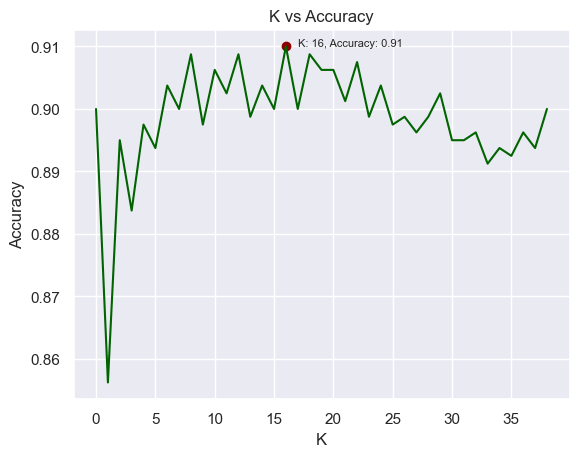

In [717]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
accuracy = []
for i in range(1,40):
    n = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    ypred = n.predict(X_test)
    accuracy.append(accuracy_score(y_test, pred))    
accx = [acc.index(max(acc))]   
accy = [max(acc)]
    
plt.plot(acc, color="darkgreen")
plt.scatter(accx, accy, c='darkred', label = '0.91')
plt.text(17, 0.91, 'K: 16, Accuracy: 0.91', size=8)
plt.title('K vs Accuracy')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy")
print("Value:", max(acc),"K:",acc.index(max(acc)))

#### KNN with 16 Neighbors 

Using the information from the hyperparametazation, a fit a new knn model with 16 neighbors. The model performed well and similar to the random forest classifier.

In [738]:
k16mod = KNeighborsClassifier(n_neighbors = 16).fit(X_train,y_train)
k16_pred = k16mod.predict(X_test)
k16acc = accuracy_score(y_test, k16_pred)
k16conf = confusion_matrix(y_test, k16_pred)
k16_prob = k16mod.predict_proba(X_test)[:, 1]
k16_fpr, k16_tpr, k16_thres = roc_curve(y_test, k16_prob)
k16report = classification_report(y_test, k16_pred)
k16_auc = auc(k16_fpr, k16_tpr)

print("Confusion Matrix:")
print(kconf)
print("  ")
print("Classification Report:")
print(kreport)
print("  ")

Confusion Matrix:
[[356  45]
 [ 37 362]]
  
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       401
           1       0.89      0.91      0.90       399

    accuracy                           0.90       800
   macro avg       0.90      0.90      0.90       800
weighted avg       0.90      0.90      0.90       800

  


***
## Results and Analysis 
***

### Accuracy Summary Between Models

The random forest and KNN classfication models had the highest accuracy values at 0.905 and 0.9, respectively. Accuracy is a metric that calculates the percentage of correctly classified observations. 

In [768]:
accuracyscores = [['Logistic Regression', logacc], ['Random Forest', rfacc], ['Decision Tree', dtacc], ['Gaussian Naive Bayes', gacc], ['KNN', k16acc]]
adf = pd.DataFrame(accuracyscores)
adf.columns = ['Model', 'Accuracy']
adf = adf.sort_values(by=['Accuracy'], ascending=False)
adf

,Model,Accuracy
4,KNN,0.90000
1,Random Forest,0.89625
2,Decision Tree,0.81000
3,Gaussian Naive Bayes,0.76250
0,Logistic Regression,0.75375


Text(0.5, 1.0, 'Accuarcy Between Models')

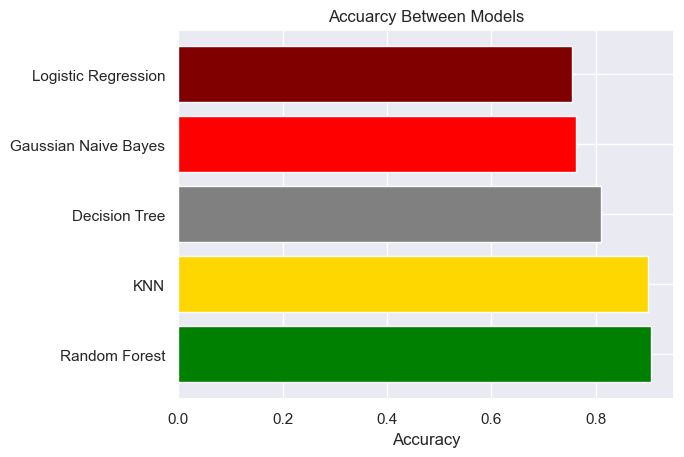

In [766]:
modpalette = ['green', 'gold', 'gray', 'red', 'maroon']
plt.barh(adf['Model'], adf['Accuracy'], color=modpalette)
plt.xlabel('Accuracy')
plt.title("Accuarcy Between Models")

### ROC Curve and AUC Summary Between Models

The ROC curves for each model is a graphical representaion comparing sensitivity and specificity. Ranking the area under the curves (AOC), shows that Random Forest and KNN models perform the best, since they are closest to 1. While Decision Tree performed in the middle of the rankings for accuracy, it fell to the bottom for AUC.

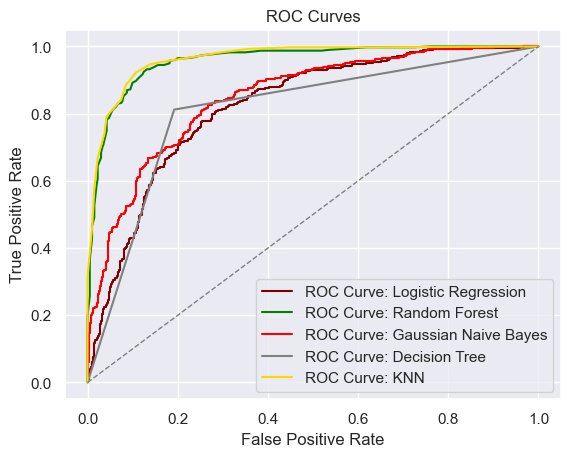

AUC Values, Ranked:
1. Random Forest: 0.9582
2. KNN: 0.9519
3. Gaussian Naive Bayes: 0.8509
4. Logistic Regression: 0.8231
5. Decision Tree: 0.81


In [767]:
plt.plot(fpr, tpr, label='ROC Curve: Logistic Regression', color='maroon')
plt.plot(rf_fpr, rf_tpr, label='ROC Curve: Random Forest', color='green')
plt.plot(g_fpr, g_tpr, label='ROC Curve: Gaussian Naive Bayes', color='red')
plt.plot(dt_fpr, dt_tpr, label='ROC Curve: Decision Tree', color='gray')
plt.plot(k16_fpr, k16_tpr, label='ROC Curve: KNN', color='gold')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc="lower right")
plt.show()
print("AUC Values, Ranked:")
print("1. Random Forest:", round(rf_auc, 4))
print("2. KNN:", round(k_auc, 4))
print("3. Gaussian Naive Bayes:", round(g_auc, 4))
print("4. Logistic Regression:", round(log_auc, 4))
print("5. Decision Tree:", round(dt_auc, 4))

***
## Discussion and Conclusion
***

###### Learning and Takeaways
There are a variety of classification models that can be used on this dataset to classify the binary categorical variables of whether an apple is considered good or bad. There were 2 levels of performance- Random Forest and KNN at the top in all comparisons, with the other 3 performing similarily at a lower level.  

When considering the importance of features, EDA showed that Ripeness and Juiciness may have the highest importance by looking at the histograms. This was backed up with feature importance of the random forest model, but indicated Size is the 2nd highest importance between Ripeness and Juiciness, respectively. 

##### What Didn't Work
The implementation of the pairplot didn't yield a useful contribution to the study, as there was no correlation between the features. The features in the dataset had already been scaled, so that may have had an effect when looking at how they compare to each other. I also attempted to look at multiple linear regression (not shown), but fell short in using the features to predict apple quality. The regression model indicated significant p-values for all features but one, but the r-squared value was quite low. 

##### Ways to Improve 
Upon review of the model implementation, it may have been beneficial to remove some data points that were outside the IQR range, ensuring no outliers. 